In [4]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error



In [5]:
df = pd.read_csv('AirPassengers.csv')
df.head()
df.rename(columns={'#Passengers':'y','Month':'ds'},inplace=True)

In [6]:
df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
df['y_orig'] = df['y']

In [8]:
df.head()

,ds,y,y_orig
0,1949-01,112,112
1,1949-02,118,118
2,1949-03,132,132
3,1949-04,129,129
4,1949-05,121,121


In [9]:
df['y'] = np.log(df['y'])

In [10]:
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [11]:
model = Prophet()
model.fit(df)

# For Now No train-test-split, passing entire data to the model, doing out of sample forecast then

# If you want to evaluate how your model is performing, you can do train-test-split

19:04:23 - cmdstanpy - INFO - Chain [1] start processing
19:04:24 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
'''     'year': 'A',
        'quarter': 'Q',
        'month':'M',
        'day':'D',
        'hour':'H',
        'minute':'T',
        'second':'S',
        'millisecond':'L',
        'microsecond':'U',
        'nanosecond':'N'
'''

#future_data = model.make_future_dataframe(periods=6, freq='H')
future_data = model.make_future_dataframe(periods=12, freq='M') # next 12 months of predictions

c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [14]:
future_data

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31


In [15]:
forecast_data = model.predict(future_data)

In [16]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,6.273835,6.440870,6.529967,6.262303,6.287148,0.212070,0.212070,0.212070,0.212070,0.212070,0.212070,0.0,0.0,0.0,6.485906
152,1961-08-31,6.283036,6.314955,6.412951,6.269133,6.299802,0.082044,0.082044,0.082044,0.082044,0.082044,0.082044,0.0,0.0,0.0,6.365079
153,1961-09-30,6.291939,6.154999,6.261920,6.275782,6.312291,-0.084342,-0.084342,-0.084342,-0.084342,-0.084342,-0.084342,0.0,0.0,0.0,6.207597
154,1961-10-31,6.301139,6.018931,6.125664,6.282250,6.324259,-0.227580,-0.227580,-0.227580,-0.227580,-0.227580,-0.227580,0.0,0.0,0.0,6.073560
155,1961-11-30,6.310043,6.163226,6.263358,6.288363,6.335782,-0.095318,-0.095318,-0.095318,-0.095318,-0.095318,-0.095318,0.0,0.0,0.0,6.214725


In [ ]:
# focus on yhat_lower, yhat_upper, yhat

In [17]:
forecast_data[['ds','yhat_lower','yhat_upper','yhat']].tail(5)

,ds,yhat_lower,yhat_upper,yhat
151,1961-07-31,6.440870,6.529967,6.485906
152,1961-08-31,6.314955,6.412951,6.365079
153,1961-09-30,6.154999,6.261920,6.207597
154,1961-10-31,6.018931,6.125664,6.073560
155,1961-11-30,6.163226,6.263358,6.214725


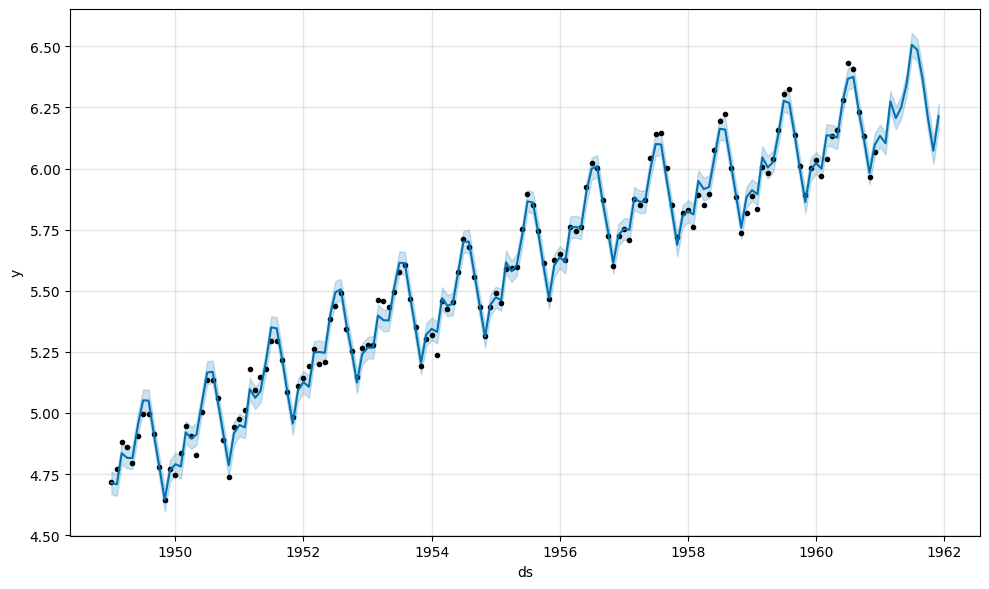

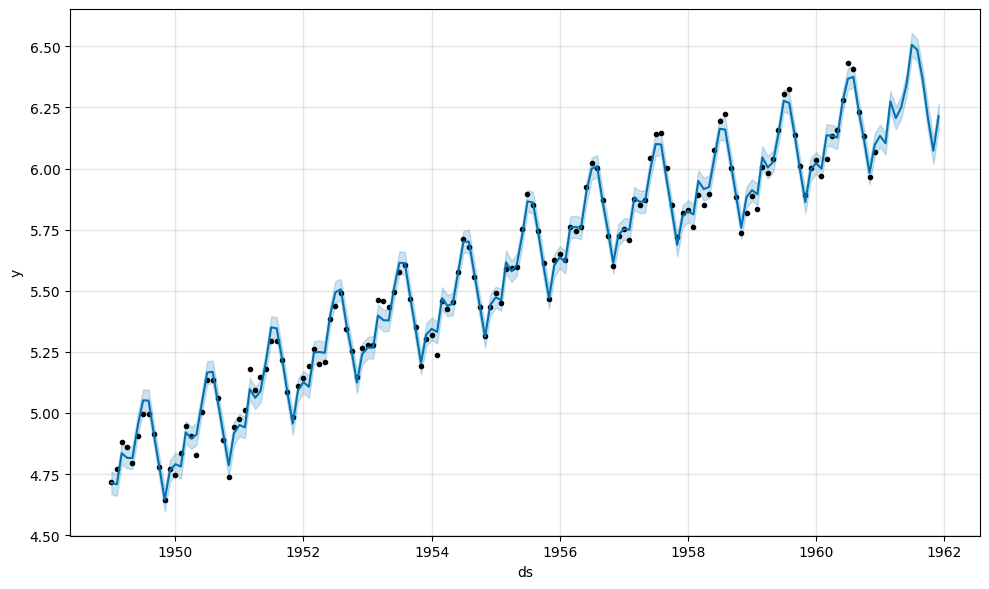

In [ ]:
model.plot(forecast_data)
# with 95% confidence, predicted value lies between yhat_upper and yhat_lower

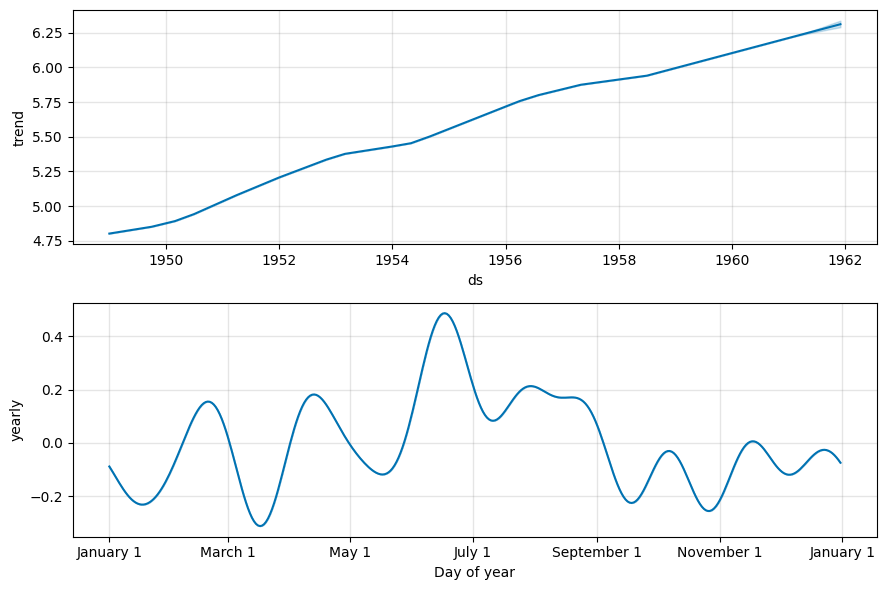

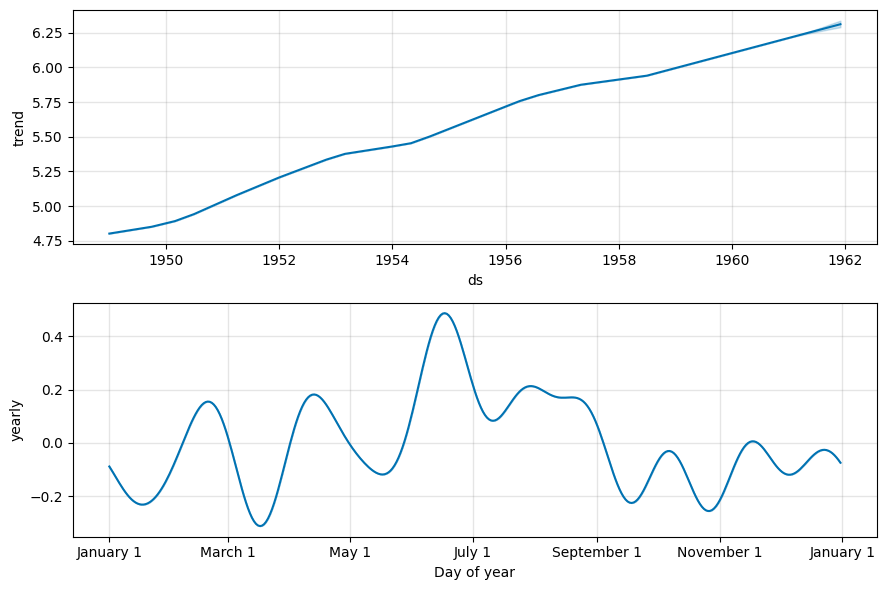

In [19]:
model.plot_components(forecast_data)

In [ ]:
# Inverse Transformation

forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

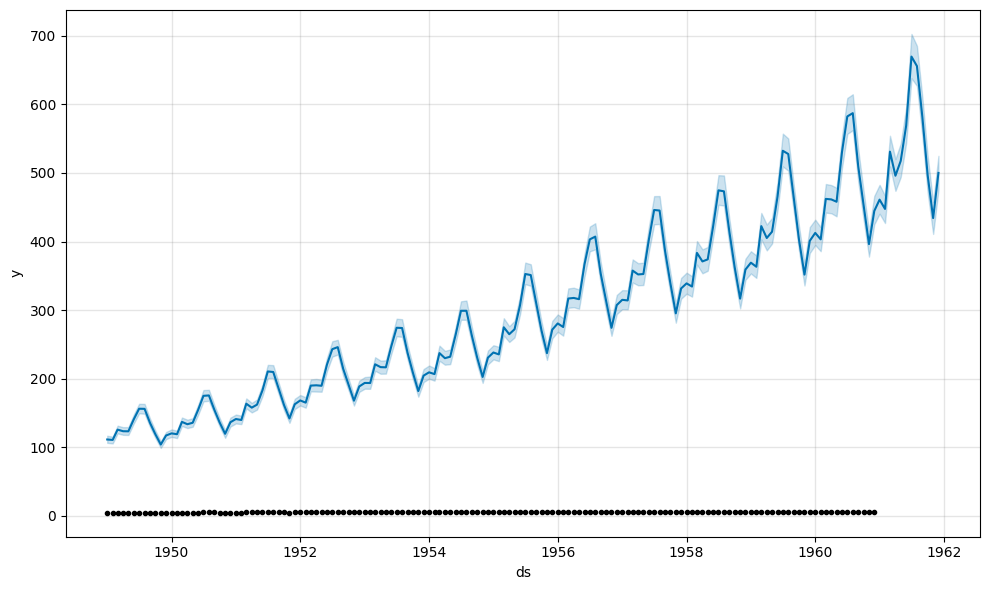

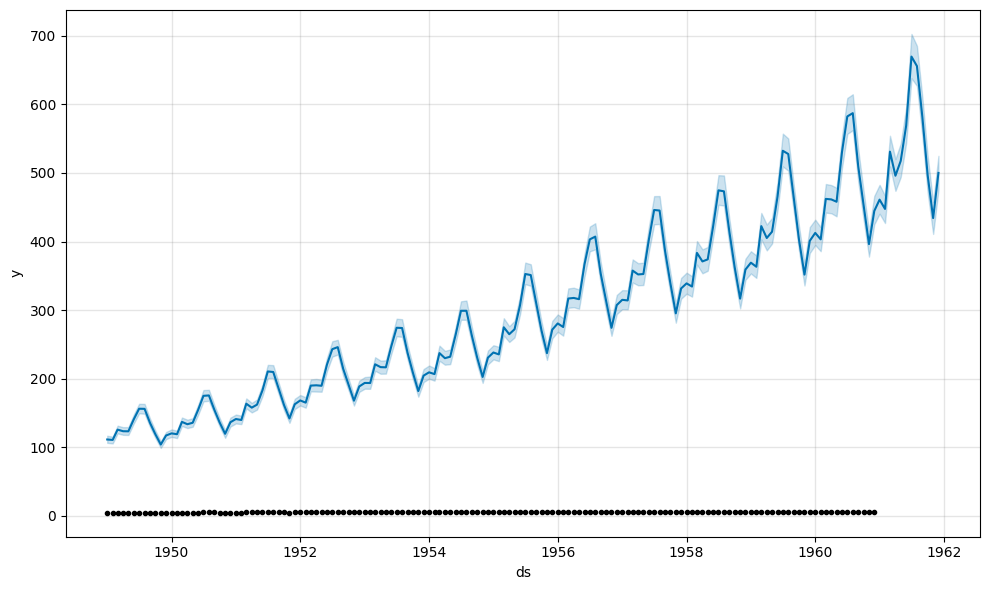

In [21]:
model.plot(forecast_data_orig)

In [22]:
final_df = pd.DataFrame(forecast_data_orig)

In [23]:
import plotly.graph_objects as go
import plotly.offline as py

In [26]:
# Plot predicted and actual line graph with X=dates , Y=Outbound

actual_chart = go.Scatter(y=df['y_orig'],name='Actual')
predict_chart = go.Scatter(y=final_df['yhat'],name='Predicted')
predict_chart_upper = go.Scatter(y=final_df['yhat_upper'],name='Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df['yhat_lower'],name='Predicted Lower')

py.plot([actual_chart,predict_chart,predict_chart_upper,predict_chart_lower], image_width = 400, image_height = 400)

'temp-plot.html'